In [1]:
import pandas as pd
import numpy as np
import json

Q1:Programmatically download and load data into your favorite analytical tool. Describe the structure of the data. Number of records and fields in each records. Basic summary stats for each field (how many null fields and min/max values?)

Number of records: 786363
<br>
Number of fields: 29
<br>
Number of null fields: 6
<br>
Min and max value of numerical fields: columnName(min, max)
<br>
avaliableMoney(-1005.63, 50000)
<br>
creditLimit(250, 50000)
<br>
currentBalance(0, 47498.81)
<br>
transactionAmount(0, 2011.54)

In [2]:
translist = []
f = open('transactions.txt','r') 

for line in f:
    translist.append(line.strip('\n'))
    
dict_list = []
for item in translist:
    a = json.loads(item)
    dict_list.append(a)

In [3]:
transactions = pd.DataFrame.from_dict(dict_list)
transactions.shape

(786363, 29)

In [8]:
transactions.dtypes

accountNumber                object
accountOpenDate              object
acqCountry                   object
availableMoney              float64
cardCVV                      object
cardLast4Digits              object
cardPresent                    bool
creditLimit                 float64
currentBalance              float64
currentExpDate               object
customerId                   object
dateOfLastAddressChange      object
echoBuffer                  float64
enteredCVV                   object
expirationDateKeyInMatch       bool
isFraud                        bool
merchantCategoryCode         object
merchantCity                float64
merchantCountryCode          object
merchantName                 object
merchantState               float64
merchantZip                 float64
posConditionCode             object
posEntryMode                 object
posOnPremises               float64
recurringAuthInd            float64
transactionAmount           float64
transactionDateTime         

In [7]:
transactions.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)
transactions.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
0,737265056,2015-03-14,US,5000.0,414,1803,False,5000.0,0.0,06/2023,...,Uber,NaN,NaN,01,02,NaN,NaN,98.55,2016-08-13T14:27:32,PURCHASE
1,737265056,2015-03-14,US,5000.0,486,767,True,5000.0,0.0,02/2024,...,AMC #191138,NaN,NaN,01,09,NaN,NaN,74.51,2016-10-11T05:05:54,PURCHASE
2,737265056,2015-03-14,US,5000.0,486,767,False,5000.0,0.0,08/2025,...,Play Store,NaN,NaN,01,09,NaN,NaN,7.47,2016-11-08T09:18:39,PURCHASE
3,737265056,2015-03-14,US,5000.0,486,767,False,5000.0,0.0,08/2025,...,Play Store,NaN,NaN,01,09,NaN,NaN,7.47,2016-12-10T02:14:50,PURCHASE
4,830329091,2015-08-06,US,5000.0,885,3143,True,5000.0,0.0,10/2029,...,Tim Hortons #947751,NaN,NaN,01,02,NaN,NaN,71.18,2016-03-24T21:04:46,PURCHASE


In [10]:
countNaN = transactions.isna().sum()
countNaN

accountNumber                    0
accountOpenDate                  0
acqCountry                    4562
availableMoney                   0
cardCVV                          0
cardLast4Digits                  0
cardPresent                      0
creditLimit                      0
currentBalance                   0
currentExpDate                   0
customerId                       0
dateOfLastAddressChange          0
echoBuffer                  786363
enteredCVV                       0
expirationDateKeyInMatch         0
isFraud                          0
merchantCategoryCode             0
merchantCity                786363
merchantCountryCode            724
merchantName                     0
merchantState               786363
merchantZip                 786363
posConditionCode               409
posEntryMode                  4054
posOnPremises               786363
recurringAuthInd            786363
transactionAmount                0
transactionDateTime              0
transactionType     

In [9]:
transactions.describe()

,availableMoney,creditLimit,currentBalance,echoBuffer,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd,transactionAmount
count,786363.000000,786363.000000,786363.000000,0.0,0.0,0.0,0.0,0.0,0.0,786363.000000
mean,6250.725369,10759.464459,4508.739089,NaN,NaN,NaN,NaN,NaN,NaN,136.985791
std,8880.783989,11636.174890,6457.442068,NaN,NaN,NaN,NaN,NaN,NaN,147.725569
min,-1005.630000,250.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1077.420000,5000.000000,689.910000,NaN,NaN,NaN,NaN,NaN,NaN,33.650000
50%,3184.860000,7500.000000,2451.760000,NaN,NaN,NaN,NaN,NaN,NaN,87.900000
75%,7500.000000,15000.000000,5291.095000,NaN,NaN,NaN,NaN,NaN,NaN,191.480000
max,50000.000000,50000.000000,47498.810000,NaN,NaN,NaN,NaN,NaN,NaN,2011.540000


Q2: plot a histogram of processed amounts of each transaction. Report any structure you find and any hypothesis you have about that structure

The histogram decreases sharply from left to right, showing a downward convex arc.
<br>
Hypothesis: log normal distribution

Text(0, 0.5, 'Number of transactions')

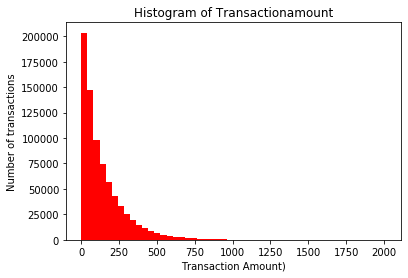

In [17]:
transactions1 = transactions[~transactions['transactionAmount'].isin([0.00])]

import matplotlib.pyplot as plt

transactions1.transactionAmount.plot(kind = 'hist', color = 'red', bins = 50)
plt.title('Histogram of Transactionamount')
plt.xlabel('Transaction Amount)')
plt.ylabel('Number of transactions')

Q3: Can you programmatically identify multiple swipe and reversed transactions? What types of transactions did you look for and what types did you find? What share of transactions (# of transactions and $ of transactions) do you estimate to be reversed?

① transactionType = 'REVERSAL'   &   assume time interval   &   same amount
<br>
② 'PURCHASE' 'REVERSAL'   &      same amount   &    time interval  

In [41]:
from datetime import datetime
transactions1['transactionTime'] = transactions1['transactionDateTime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))

transaction2.sort_values(by = 'transactionTime',inplace = True, ascending = True)

transaction2['Time'] = transaction2.transactionTime - transaction2.transactionTime.shift(1)
transaction2['Minutes']=transaction2.Time.astype('timedelta64[m]')

transaction2['Amount'] = transaction2.transactionAmount - transaction2.transactionAmount.shift(1)

transaction2.head(10)

#transaction2['Amount'].value_counts()
transaction2['Minutes'].value_counts()


/Users/cnq0316/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/cnq0316/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/cnq0316/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

0.0      715
2.0      693
1.0      670
3.0      640
4.0      633
5.0      633
6.0      603
8.0      561
7.0      536
10.0     522
9.0      518
13.0     496
11.0     469
14.0     446
12.0     445
15.0     420
16.0     411
17.0     402
18.0     365
20.0     350
19.0     339
23.0     322
22.0     313
26.0     291
24.0     285
21.0     284
28.0     283
25.0     274
27.0     247
29.0     233
        ... 
189.0      1
232.0      1
170.0      1
163.0      1
217.0      1
302.0      1
284.0      1
147.0      1
199.0      1
200.0      1
180.0      1
214.0      1
216.0      1
268.0      1
208.0      1
240.0      1
186.0      1
248.0      1
156.0      1
219.0      1
242.0      1
237.0      1
139.0      1
222.0      1
152.0      1
209.0      1
202.0      1
206.0      1
172.0      1
175.0      1
Name: Minutes, Length: 207, dtype: int64

Q4: build a model to predict fraud transactions.

In [42]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
transactions.loc[transactions['isFraud'] == 'false'] = 0
transactions.loc[transactions['isFraud'] == 'true'] = 1

transactions['isFraud'].value_counts()

In [ ]:
sns.countplot(x = 'isFraud', data = transactions)
plt.show()

In [ ]:
not_fraud = len(transactions[transactions['y']==0])
fraud = len(transactions[transactions['y']==1])
pct_of_not_fraud = not_fraud/(not_fraud + fraud)
pct_of_fraud = count_sub/(not_fraud + fraud)
pct_of_not_fraud, pct_of_fraud

In [ ]:
transactions.groupby('isFraud').mean

In [ ]:
pd.crosstab(transactions.avaliableMoney,transactions.isFraud).plot(kind='bar')
plt.xlabel('avaliableMoney')
plt.ylabel('isFraud')
plt.show()

In [ ]:
pd.crosstab(transactions.creditLimit,transactions.isFraud).plot(kind='bar')
plt.xlabel('creditLimit')
plt.ylabel('isFraud')
plt.show()

In [ ]:
pd.crosstab(transactions.currentBalance,transactions.isFraud).plot(kind='bar')
plt.xlabel('currentBalance')
plt.ylabel('isFraud')
plt.show()

In [ ]:
pd.crosstab(transactions.merchantCategoryCode,transactions.isFraud).plot(kind='bar')
plt.xlabel('merchantCategoryCode')
plt.ylabel('isFraud')
plt.show()

In [ ]:
pd.crosstab(transactions.transactionAmount,transactions.isFraud).plot(kind='bar')
plt.xlabel('transactionAmount')
plt.ylabel('isFraud')
plt.show()

In [ ]:
pd.crosstab(transactions.transactionType,transactions.isFraud).plot(kind='bar')
plt.xlabel('transactionType')
plt.ylabel('isFraud')
plt.show()

In [ ]:
LR_vars = ['avaliableMoney','creditLimit','currentBalance','merchantCategoryCode','transactionAmount']
for var in LR_vars:
    LR_list = 'var'+'_'+var
    LR_list = pd.get_dummies(transactions[var], prefix=var)
    transaction3 = transactions.join(LR_list)
    transactions = transaction3
LR_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
transactions_vars = transactions.columns.values.tolist()
to_keep=[i for i in transactions_vars if i not in LR_vars]

transactions_final=transactions[to_keep]

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(transactions['isFraud'],transactions_final)
result=logit_model.fit()
print(result.summary2())

In [ ]:
var_train, var_test, fraud_train, fraud_test = train_test_split(transactions_final, transactions['isFraud'], test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(var_train, fraud_train)

In [ ]:
fraud_pred = logreg.predict(var_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(var_test, fraud_test)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(fraud_test, fraud_pred))